In [ ]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 8.6 MB/s eta 0:00:00


[I 2025-11-14 00:00:40,050] A new study created in memory with name: no-name-4e1374d4-d0b2-4eda-b05e-ad0fcd36300b


[LOF] Muestras: 16599 → 15769 (removidos 830)
🚀 Iniciando optimización corregida con Optuna...


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-11-14 00:00:40,072] Trial 0 finished with value: 0.0005033376664552941 and parameters: {'C': 237.41880673518153, 'gamma': 0.015568353864860914, 'epsilon': 0.7814741170765537}. Best is trial 0 with value: 0.0005033376664552941.
[I 2025-11-14 00:00:40,083] Trial 1 finished with value: 0.0005033376664552953 and parameters: {'C': 38.04421887217278, 'gamma': 0.0005154590255267476, 'epsilon': 0.44717742977545377}. Best is trial 0 with value: 0.0005033376664552941.
[I 2025-11-14 00:00:40,098] Trial 2 finished with value: 0.0005033376664552953 and parameters: {'C': 2.6264768919328194, 'gamma': 0.2057413660021104, 'epsilon': 0.4675481087882682}. Best is trial 0 with value: 0.0005033376664552941.
[I 2025-11-14 00:00:40,110] Trial 3 finished with value: 0.0005033376664552948 and parameters: {'C': 220.90684498477967, 'gamma': 0.8280042504075246, 'epsilon': 0.09527381880038545}. Best is trial 0 with value: 0.0005033376664552941.
[I 2025-11-14 00:00:40,121] Trial 4 finished with value: 0.000

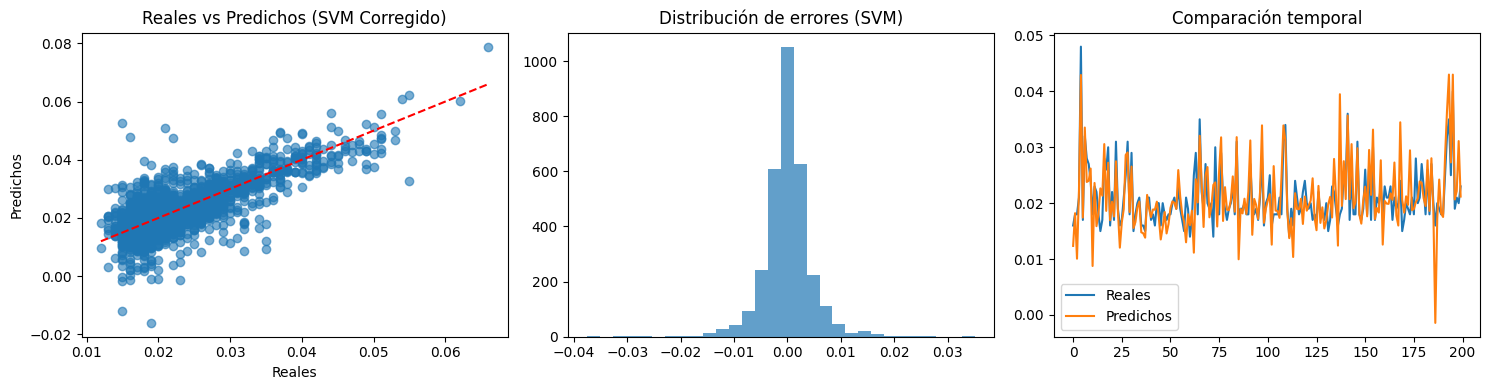

In [ ]:
# ================================================
# 🔹 MODELO SVM OPTIMIZADO
# ================================================

import time
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import optuna

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import SVR

# ---------------- DATASET ----------------
url = "https://raw.githubusercontent.com/Alisser2001/QuantumMachineLearning/emmadev/elevators.dat"
resp = requests.get(url)
lines = [line.strip() for line in resp.text.splitlines()]
attributes = [line.split()[1] for line in lines if line.startswith("@attribute")]
data_start = lines.index("@data") + 1
data = [line.split(",") for line in lines[data_start:] if line]
df = pd.DataFrame(data, columns=attributes).astype(float)

X_full, y_full = df.drop(columns=["Goal"]).values, df["Goal"].values

# 🔹 Solo StandardScaler
sc_raw = StandardScaler().fit(X_full)
X_scaled = sc_raw.transform(X_full)

# 🔹 Outliers (LOF)
mask = LocalOutlierFactor(n_neighbors=20, contamination=0.05).fit_predict(X_scaled) == 1
X, y = X_scaled[mask], y_full[mask]

print(f"[LOF] Muestras: {len(df)} → {len(X)} (removidos {len(df)-len(X)})")

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

# ============================================
# 🔍 OPTIMIZACIÓN CON OPTUNA
# ============================================

def objective(trial):

    # SVM hyperparameters
    C = trial.suggest_float("C", 0.1, 1000, log=True)
    gamma = trial.suggest_float("gamma", 1e-4, 1.0, log=True)
    epsilon = trial.suggest_float("epsilon", 0.001, 1.0)

    model = SVR(kernel="rbf", C=C, gamma=gamma, epsilon=epsilon)

    model.fit(X_tr, y_tr)
    preds = model.predict(X_te)

    mse = mean_squared_error(y_te, preds)
    return mse

print("🚀 Iniciando optimización corregida con Optuna...")
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=40, show_progress_bar=True)

print("\n🏆 Mejor configuración encontrada (corregida):")
print(study.best_params)

# ===================================================
# 🔹 ENTRENAMIENTO FINAL
# ===================================================
best = study.best_params

modelo_final = SVR(
    kernel="rbf",
    C=best["C"],
    gamma=best["gamma"],
    epsilon=best["epsilon"]
)

t0 = time.time()
modelo_final.fit(X_tr, y_tr)
y_pred = modelo_final.predict(X_te)
t1 = time.time()

mse = mean_squared_error(y_te, y_pred)
r2 = r2_score(y_te, y_pred)

print("\n📊 Resultados finales del modelo SVM CORREGIDO:")
print(f"MSE: {mse:.6f}")
print(f"R²: {r2:.6f}")
print(f"Tiempo total: {t1 - t0:.3f} s")

# ===================================================
# 📈 VISUALIZACIONES DE RESULTADOS
# ===================================================

plt.figure(figsize=(15, 4))

# 1️⃣ Reales vs Predicciones
plt.subplot(1, 3, 1)
plt.scatter(y_te, y_pred, alpha=0.6)
plt.plot([y_te.min(), y_te.max()], [y_te.min(), y_te.max()], 'r--')
plt.xlabel("Reales")
plt.ylabel("Predichos")
plt.title("Reales vs Predichos (SVM Corregido)")

# 2️⃣ Histograma de errores
plt.subplot(1, 3, 2)
errores = y_te - y_pred
plt.hist(errores, bins=30, alpha=0.7)
plt.title("Distribución de errores (SVM)")

# 3️⃣ Gráfico temporal
plt.subplot(1, 3, 3)
plt.plot(y_te[:200], label="Reales")
plt.plot(y_pred[:200], label="Predichos")
plt.title("Comparación temporal")
plt.legend()

plt.tight_layout()
plt.show()


[I 2025-11-19 06:00:39,185] A new study created in memory with name: no-name-bc484a65-b41c-4181-959c-cdf154b68994


[LOF] Muestras: 16599 → 15769 (removidos 830)
🚀 Iniciando optimización del MLP con Optuna...


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-11-19 06:00:39,685] Trial 0 finished with value: 4.395959400655038e-05 and parameters: {'n_layers': 2, 'layer_size': 27, 'activation': 'tanh', 'solver': 'adam', 'alpha': 1.1849773563856439e-05, 'lr': 0.009546408672816748}. Best is trial 0 with value: 4.395959400655038e-05.
[I 2025-11-19 06:00:42,603] Trial 1 finished with value: 4.574833601908035e-05 and parameters: {'n_layers': 2, 'layer_size': 218, 'activation': 'relu', 'solver': 'adam', 'alpha': 2.1818308830699085e-06, 'lr': 0.004180097250673141}. Best is trial 0 with value: 4.395959400655038e-05.
[I 2025-11-19 06:00:45,926] Trial 2 finished with value: 1.3102570826662259e-05 and parameters: {'n_layers': 1, 'layer_size': 36, 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.005227728736242071, 'lr': 0.0002677342987539282}. Best is trial 2 with value: 1.3102570826662259e-05.
[I 2025-11-19 06:00:47,924] Trial 3 finished with value: 3.722518600093527e-05 and parameters: {'n_layers': 4, 'layer_size': 29, 'activation': 'relu', 

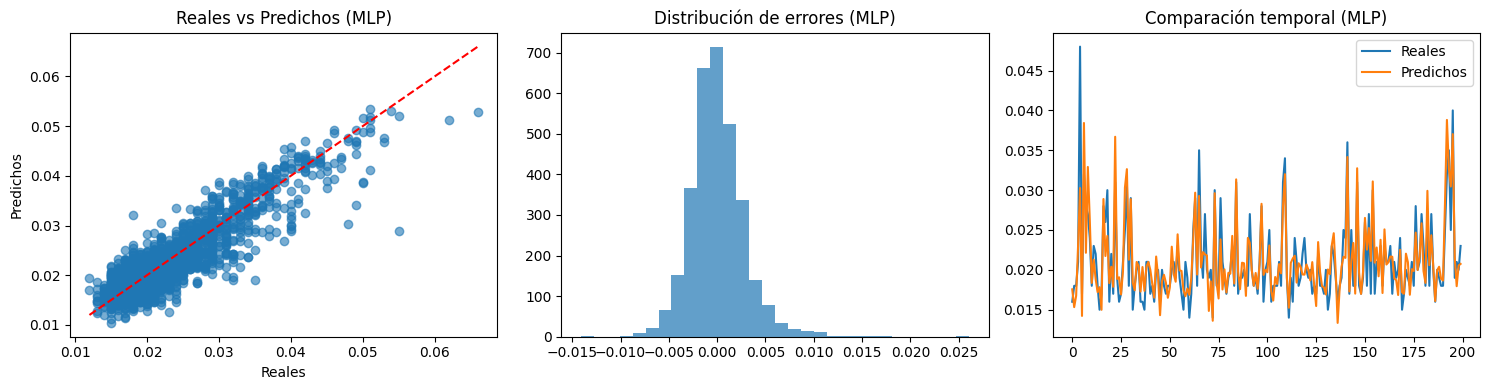

In [ ]:
# ================================================
# 🔹 MODELO MLP (RED NEURONAL) OPTIMIZADO
# ================================================

import time
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import optuna

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ---------------- DATASET ----------------
url = "https://raw.githubusercontent.com/Alisser2001/QuantumMachineLearning/emmadev/elevators.dat"
resp = requests.get(url)
lines = [line.strip() for line in resp.text.splitlines()]
attributes = [line.split()[1] for line in lines if line.startswith("@attribute")]
data_start = lines.index("@data") + 1
data = [line.split(",") for line in lines[data_start:] if line]
df = pd.DataFrame(data, columns=attributes).astype(float)

X_full, y_full = df.drop(columns=["Goal"]).values, df["Goal"].values

# 🔹 StandardScaler
sc_raw = StandardScaler().fit(X_full)
X_scaled = sc_raw.transform(X_full)

# 🔹 Outliers con LOF
mask = LocalOutlierFactor(n_neighbors=20, contamination=0.05).fit_predict(X_scaled) == 1
X, y = X_scaled[mask], y_full[mask]

print(f"[LOF] Muestras: {len(df)} → {len(X)} (removidos {len(df)-len(X)})")

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

# ============================================
# 🔍 OPTIMIZACIÓN CON OPTUNA PARA MLP
# ============================================

def objective(trial):

    # Hiperparámetros de la red neuronal
    hidden_layers = trial.suggest_int("n_layers", 1, 4)
    layer_size = trial.suggest_int("layer_size", 16, 256, log=True)

    hidden_structure = tuple([layer_size] * hidden_layers)

    activation = trial.suggest_categorical("activation", ["relu", "tanh"])
    solver = trial.suggest_categorical("solver", ["adam", "lbfgs"])
    alpha = trial.suggest_float("alpha", 1e-6, 1e-2, log=True)
    learning_rate_init = trial.suggest_float("lr", 1e-5, 1e-2, log=True)

    model = MLPRegressor(
        hidden_layer_sizes=hidden_structure,
        activation=activation,
        solver=solver,
        alpha=alpha,
        learning_rate_init=learning_rate_init,
        max_iter=500,
        random_state=42
    )

    model.fit(X_tr, y_tr)
    preds = model.predict(X_te)

    mse = mean_squared_error(y_te, preds)
    return mse


print("🚀 Iniciando optimización del MLP con Optuna...")
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=40, show_progress_bar=True)

print("\n🏆 Mejor configuración encontrada MLP:")
print(study.best_params)

# ===================================================
# 🔹 ENTRENAMIENTO FINAL
# ===================================================
best = study.best_params

hidden_layers = tuple([best["layer_size"]] * best["n_layers"])

modelo_final = MLPRegressor(
    hidden_layer_sizes=hidden_layers,
    activation=best["activation"],
    solver=best["solver"],
    alpha=best["alpha"],
    learning_rate_init=best["lr"],
    max_iter=700,
    random_state=42
)

t0 = time.time()
modelo_final.fit(X_tr, y_tr)
y_pred = modelo_final.predict(X_te)
t1 = time.time()

mse = mean_squared_error(y_te, y_pred)
r2 = r2_score(y_te, y_pred)

print("\n📊 Resultados finales del MLP (Red Neuronal):")
print(f"MSE: {mse:.6f}")
print(f"R²: {r2:.6f}")
print(f"Tiempo total: {t1 - t0:.3f} s")

# ===================================================
# 📈 VISUALIZACIONES DE RESULTADOS
# ===================================================

plt.figure(figsize=(15, 4))

# 1️⃣ Reales vs Predicciones
plt.subplot(1, 3, 1)
plt.scatter(y_te, y_pred, alpha=0.6)
plt.plot([y_te.min(), y_te.max()], [y_te.min(), y_te.max()], 'r--')
plt.xlabel("Reales")
plt.ylabel("Predichos")
plt.title("Reales vs Predichos (MLP)")

# 2️⃣ Histograma de errores
plt.subplot(1, 3, 2)
errores = y_te - y_pred
plt.hist(errores, bins=30, alpha=0.7)
plt.title("Distribución de errores (MLP)")

# 3️⃣ Gráfico temporal
plt.subplot(1, 3, 3)
plt.plot(y_te[:200], label="Reales")
plt.plot(y_pred[:200], label="Predichos")
plt.title("Comparación temporal (MLP)")
plt.legend()

plt.tight_layout()
plt.show()
